In [1]:
# 基本のライブラリを読み込む
import numpy as np
import pandas as pd
from scipy import stats

# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# 統計モデル
import statsmodels.api as sm

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


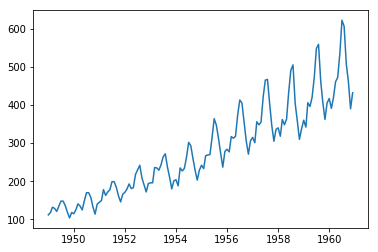

In [9]:
# 日付形式で読み込む
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('../01_input/AirPassengers.csv', index_col='Month', date_parser=dateparse, dtype='float')

# 日付形式にする
ts = data['#Passengers'] 
ts.head()

# プロット
plt.plot(ts)

## ローカルレベルモデル

In [16]:
# ローカルレベルモデルの推定
mod_local_level = sm.tsa.UnobservedComponents(ts, 'local level')

# 最尤法によるパラメタの推定
res_local_level = mod_local_level.fit()

                        Unobserved Components Results                         
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                    local level   Log Likelihood                -705.955
Date:                Sun, 07 Jul 2019   AIC                           1415.909
Time:                        19:55:06   BIC                           1421.849
Sample:                    01-01-1949   HQIC                          1418.323
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1.313e-07     85.482   1.54e-09      1.000    -167.542     167.542
sigma2.level      1136.4043    176.695      6.431      0.000     790.088    1482.721
Ljung-Box (Q):              

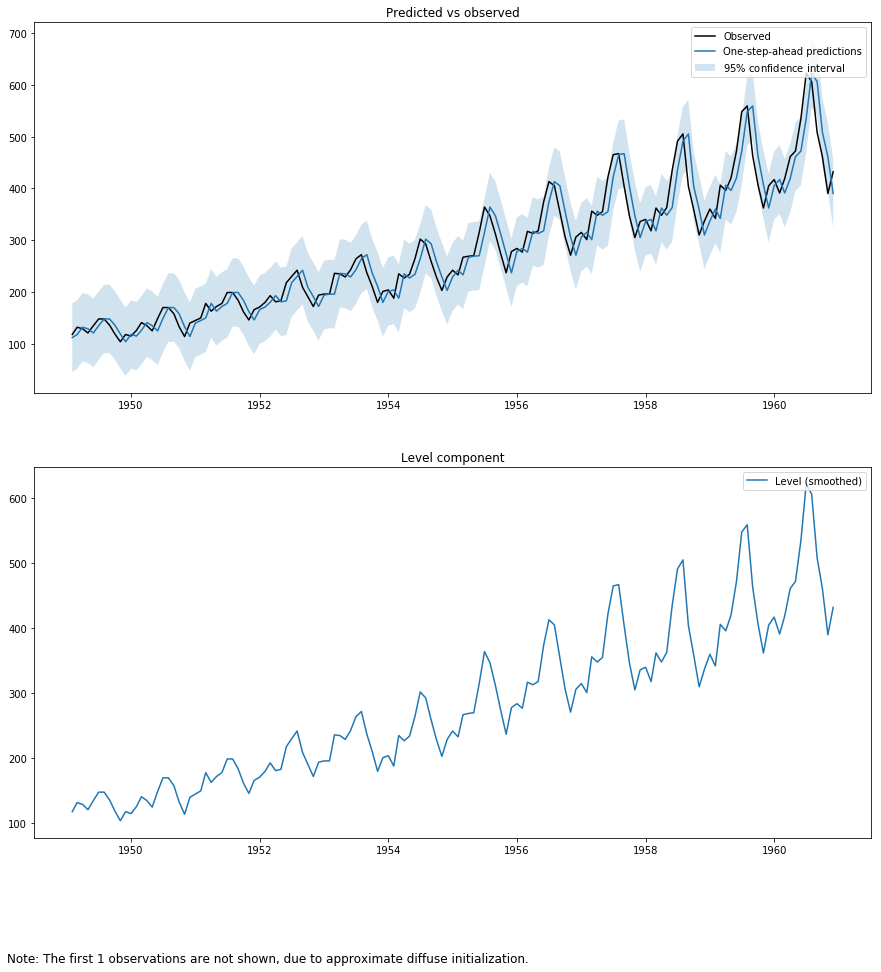

In [21]:
# 推定されたパラメタ一覧
print(res_local_level.summary())

# 推定された状態・トレンドの描画
rcParams['figure.figsize'] = 15, 15
fig = res_local_level.plot_components()

* 一つ目のグラフが、観測値と予測結果の比較のグラフ。2つ目が推定された状態のグラフです。
* 1つ目を見ると黒い線の観測値と青い線の予測値がちょうど1か月だけずれていることがわかります。
* ローカルレベルモデルは推定は簡単なのですが、じつは「来期の予測値は前期の観測値と同じ」という予測結果を出します。
* なので予測はあまりぱっとしない感じになります。
* 逆に言えば、ローカルレベルモデル以上の予測結果が出せなければ、複雑なモデルを使う意味がないということですね。

## ローカル線形トレンドモデル

In [24]:
# ローカル線形トレンドモデル

mod_trend = sm.tsa.UnobservedComponents(
    ts,
    'local linear trend'
)

# 最尤法によるパラメタの推定
# ワーニングが出たのでBFGS法で最適化する
res_trend = mod_trend.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 5.015259
         Iterations: 19
         Function evaluations: 30
         Gradient evaluations: 30


                        Unobserved Components Results                         
Dep. Variable:            #Passengers   No. Observations:                  144
Model:             local linear trend   Log Likelihood                -722.197
Date:                Sun, 07 Jul 2019   AIC                           1450.394
Time:                        20:14:51   BIC                           1459.304
Sample:                    01-01-1949   HQIC                          1454.015
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular    86.5907    167.523      0.517      0.605    -241.749     414.930
sigma2.level         0.0004    652.086   6.22e-07      1.000   -1278.064    1278.065
sigma2.trend      1086.3825 

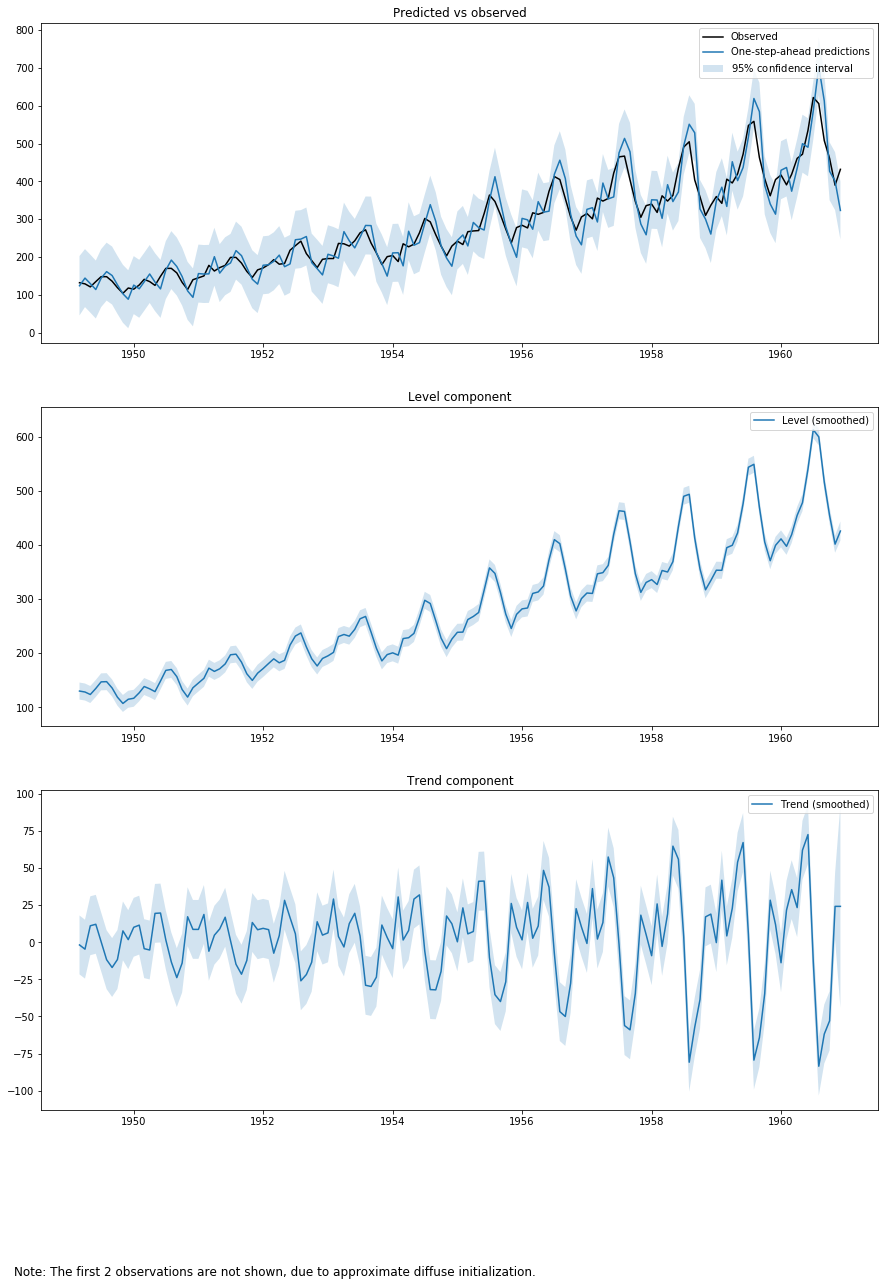

In [25]:
# 推定されたパラメタ一覧
print(res_trend.summary())

# 推定された状態・トレンドの描画
rcParams['figure.figsize'] = 15, 20
fig = res_trend.plot_components()